In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(41)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

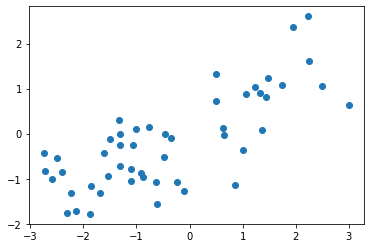

In [3]:
#a
x, y = make_wave(50)
plt.scatter(x, y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


C:\Users\KYLE\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0, 0.5, 'score')

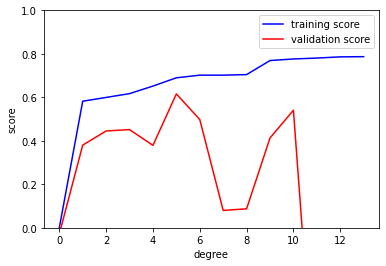

In [6]:
#b
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

def PolynomialRegression(degree=2, **kwargs):
     return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

degree = np.arange(0,14)
print(degree)

train_score, val_score = validation_curve(PolynomialRegression(),x,y,
                                         'polynomialfeatures__degree', degree, cv =7)

plt.plot(degree, np.median(train_score, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score, 1), color = 'red' ,label = 'validation score')
plt.legend(loc = 'best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')
    

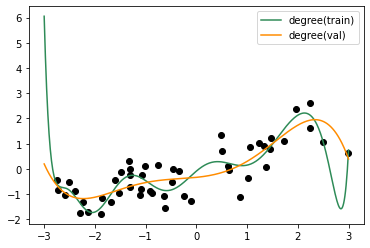

In [16]:
#c
X_test = np.linspace(-3.0, 3.0, 500)[:, np.newaxis]
color_list= ['seagreen', 'darkorange']
y_test = PolynomialRegression(5).fit(x, y).predict(X_test)
y_test_t = PolynomialRegression(13).fit(x, y).predict(X_test)

plt.plot(X_test, y_test_t, color = color_list[0], label = 'degree(train)')
plt.plot(X_test, y_test, color = color_list[1], label = 'degree(val)')
plt.scatter(x,y,color = 'black')
plt.legend(loc = 'best')
plt.ylim = (-3,3)
plt.xlim = (-3,3)